# Juntando R y Python con rpy2

In [1]:
import pandas as pd
import numpy as np
import os
# recordar instalar con conda install -c r rpy2  
os.environ['R_HOME'] = 'C:/ProgramData/Anaconda3/Lib/R'

In [2]:
from IPython.display import Image

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import rpy2

In [5]:
import rpy2.robjects as ro #interactuamos directamente con r
import rpy2.robjects.numpy2ri #permite conversión entre un dato y otro, de numpy a rpy2

Unable to determine R library path: Command '('C:/ProgramData/Anaconda3/Lib/R\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


In [6]:
rpy2.robjects.numpy2ri.activate()

In [7]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola,",cadena))
}
"""

In [8]:
ro.r(codigo_r)

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x000001E39A1A2B40> [RTYPES.CLOSXP]
R classes: ('function',)

In [9]:
saludar_py = ro.globalenv["saludar"]

In [10]:
saludar_py("Antonio Banderas")

"'Hola, Antonio Banderas'"


In [11]:
res = saludar_py("Antonio Banderas")
res[0]

'Hola, Antonio Banderas'

In [12]:
type(res)

rpy2.robjects.vectors.StrVector

In [13]:
print(saludar_py.r_repr()) #desde python podemos acceder a R y bisceversa

function (cadena) 
{
    return(paste("Hola,", cadena))
}


In [14]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [15]:
var_from_python 

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [16]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [17]:
ro.globalenv["var_to_r"] = var_from_python # añade en r una variable var_to_r a partir de var_from_python

In [18]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [19]:
ro.r("sum(var_to_r)")

array([118.])

In [20]:
ro.r("mean(var_to_r)")

array([2.95])

In [21]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [22]:
np.sum(var_from_python)

118.00000000000007

In [23]:
np.mean(var_from_python)

2.950000000000002

In [24]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [25]:
#ro.r("hist(var_to_r, breaks = 6)")

# Trabajar de forma conjunta entre R y Python

In [26]:
from rpy2.robjects.packages import importr #importamos librerías directamente desde R

In [27]:
#ro.r("install.packages('extRemes')")
extremes = importr("extRemes") #library(extRemes)

In [28]:
fevd = extremes.fevd

In [29]:
print(fevd.__doc__)

Wrapper around an R function.

The docstring below is built from the R documentation.

description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x000001E39D5D5F40> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

Args:
   x :  'fevd': 'x' can be a numeric vector, the name of

In [30]:
data = pd.read_csv("../../Data-Sets/datasets/time/time_series1.txt", sep= "\s+")

In [31]:
data

,YYYYMMDD,HHMM,M(m/s)
0,19830101,0,7.9
1,19830101,100,8.2
2,19830101,200,8.5
3,19830101,300,9.0
4,19830101,400,9.9
...,...,...,...
275347,20140531,1900,6.9
275348,20140531,2000,6.5
275349,20140531,2100,6.2
275350,20140531,2200,5.9


In [32]:
#Juntando dos columnas de un dataset.
data = pd.read_csv("../../Data-Sets/datasets/time/time_series.txt", sep= "\s+", skiprows = 1, parse_dates = [[0,1]], names = ["date", "time", "wind_speed"], engine='python', index_col = 0)

In [33]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [34]:
data.shape

(275352, 1)

In [35]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [36]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='date_time'>

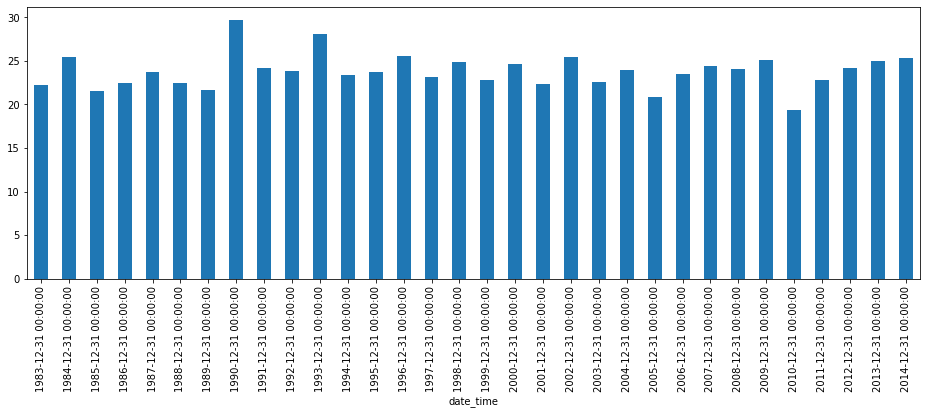

In [37]:
max_ws.plot(kind = "bar", figsize = (16,5))

In [38]:
result  = fevd(max_ws.values, type = "GEV", method = "GMLE") #función de R

In [39]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [40]:
result.r_repr

<bound method RObjectMixin.r_repr of <rpy2.robjects.vectors.ListVector object at 0x000001E3A089A780> [RTYPES.VECSXP]
R classes: ('fevd',)
[LangSexpV..., StrSexpVe..., FloatSexp..., BoolSexpV..., ..., StrSexpVe..., StrSexpVe..., ListSexpV..., ListSexpV...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  )
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x000001E3A0C038C0> [RTYPES.STRSXP]
R classes: ('character',)
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'numpy.ndarray'>
  array([1.])
  missing.values: <class 'rpy2.robjects.vectors.BoolArray'>
  <rpy2.robjects.vectors.BoolArray object at 0x000001E3A5A51D40> [RTYPES.LGLSXP]
R classes: ('array',)
[       0,        0,        0,        0, ...,        0,        0,        0,        0]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector obje

In [41]:
result.names

'call','data.name','weights',...,'parnames','results','initial....


In [42]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



In [43]:
res = result.rx("results")
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





In [44]:
print(res.r_repr)

<bound method RObjectMixin.r_repr of <rpy2.robjects.vectors.ListVector object at 0x000001E3A0BFD580> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpVector]
  results: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001E3A0C0E780> [RTYPES.VECSXP]>


In [45]:
print(res[0].r_repr)

<bound method RObjectMixin.r_repr of <rpy2.robjects.vectors.ListVector object at 0x000001E3A0C0EAC0> [RTYPES.VECSXP]
R classes: ('list',)
[Floa..., Floa..., IntS..., IntS..., NULL..., Floa..., List...]
  par: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x000001E3A0C0EB80> [RTYPES.REALSXP]
  value: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x000001E3A0C0EDC0> [RTYPES.REALSXP]
  counts: <class 'rpy2.rinterface.IntSexpVector'>
  <rpy2.rinterface.IntSexpVector object at 0x000001E3A0C0EB80> [RTYPES.INTSXP]
  convergence: <class 'rpy2.rinterface.IntSexpVector'>
  <rpy2.rinterface.IntSexpVector object at 0x000001E3A0C0EDC0> [RTYPES.INTSXP]
  message: <class 'rpy2.rinterface_lib.sexp.NULLType'>
  <rpy2.rinterface_lib.sexp.NULLType object at 0x000001E39A16F400> [RTYPES.NILSXP]
  hessian: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x000001E3A0C120C0> [RTYPES.REALSXP

In [46]:
loc, scale, shape = res[0].rx("par")[0]

In [47]:
loc, scale, shape 

(23.063941519915588, 1.7576912874286317, -0.1628816367714792)

## Función mágica para R

In [48]:
%load_ext rpy2.ipython

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [49]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE] [-b BG] [--noisolation] [-u {px,in,cm,mm}]
             [-r RES] [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code ...]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothin

In [50]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [51]:
%%R
Y = c(2,4,3,9)
LM = lm(Y~X)
summary(LM)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



In [52]:
# %R -i result plot.fevd(result)

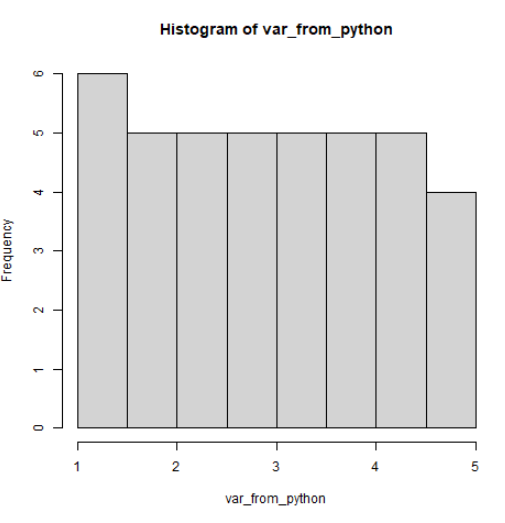

In [53]:
#%R -i var_from_python hist(var_from_python)
Image(filename="C:/Users/Kevin/Desktop/Kevin/1-Cursos/1-Machine Learning/CURSO UDEMY ML/17-Juntar R y Python/rplot2.png")

In [54]:
#%R -i result plot.fevd(result)

In [55]:
#ro.globalenv["result"] = result
#ro.r("plot.fevd(result)")

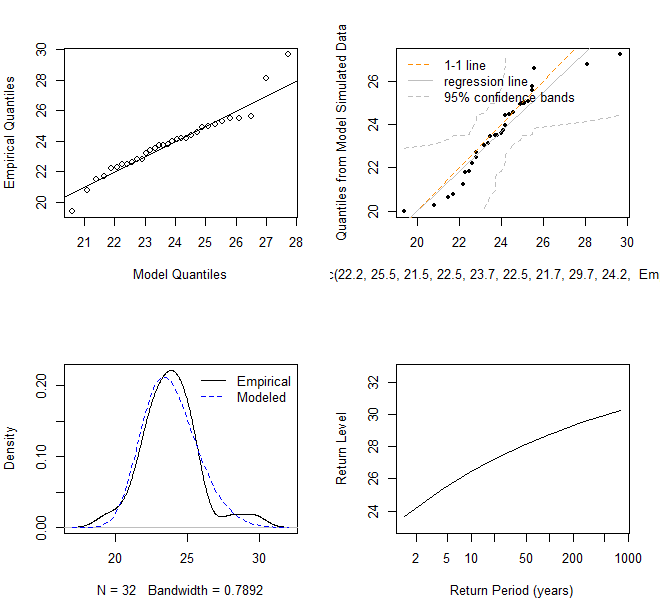

In [56]:
Image(filename="C:/Users/Kevin/Desktop/Kevin/1-Cursos/1-Machine Learning/CURSO UDEMY ML/17-Juntar R y Python/rplot.png")

# Un ejemplo coplejo de R, Python y Rmagic

In [65]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipo = ["GEV", "Gumbel"]

In [66]:
for t in tipo:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Tipo de Método del Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        ro.globalenv["result"] = result
        ro.r("plot.fevd(result)")
        # %R -i result plot.fevd(result) crashea a la mierda

Tipo de Ajuste:  GEV
Tipo de Método del Ajuste:  MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      28        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1



Tipo de Ajuste:  GEV
Tipo de Método del Ajuste:  GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1



Tipo de Ajuste:  GEV
Tipo de Método del Ajuste:  Bayesian
[[ 2.3063941

R[write to console]: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  :
R[write to console]: 
 


Tipo de Ajuste:  Gumbel
Tipo de Método del Ajuste:  MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL



Tipo de Ajuste:  Gumbel
Tipo de Método del Ajuste:  GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL



Tipo de Ajuste:  Gumbel
Tipo de Método del Ajuste:  Bayesian


R[write to console]:  fevd: Using method MLE.  No default for specified arguments.



RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length


 Se puede aprovechar el potencial de cálculo estadístico de R combinado con el potencial lógico, de carga y administración de datos de python para sacar el mejor provecho de ambos lenguajes. **R** no es un lenguaje de programación sino una **herramienta estadística** y **Python** si es un lenguaje de programación que posee varias herramientas estadísticas.